# Выбор количества кластеров $k$ в алгоритме *k-means*

Существенный недостаток алгоритма заключается в необходимости до начала эксперимента выбирать количество кластеров. В этом уроке мы научимся выбирать количество кластеров $K$ автоматически.

Мы будем подходить к выбору оптимального количества кластеров, как к задаче оптимизации - выберем метрику качества кластеризации, которая зависит от параметра $K$ найдём как-нибудь, при каком значении $K$ у нас самая лучшая кластеризация. Хорошей метрикой качества является т.н. внутрикластерное расстояние.

Для подбора вводится метрика качества кластеризации с центроидами $\mu_k: \forall k=1,\ldots,K$, которая измеряет внутрикластерное расстояние - насколько хорошо центр, который мы выбрали, совпадает с "идеальным" центром кластера
$$
J(C) = \sum_{k=1}^{K}\sum_{j \in C_k} \mid x_j - \mu_k \mid \rightarrow min
$$

В этой формуле
* $\mu_k$ - координаты центроида кластера под номером $k$, количество кластеров $k$
* $x_j$ - объект под номером $j$, принадлежащий кластеру под номером $k$
* $\mid x_j - \mu_k \mid$ - евклидово расстояние (см. первый урок) от примера $x_j$ до центроида $\mu_k$

Очевидно, что эта метрика достигает оптимума в точке, где количество соответствует количеству элементов в выборке. Однако, это вырожденный случай - на практике применяют эвристику "метод локтя", которая предполагает выбор точки, в которой резко снижается динамика изменения $J(C)$:
$$
D(K) =\frac{\mid J(C_{k+1}) - J(C_{k}) \mid}{\mid J(C_{k}) - J(C_{k-1}) \mid} \rightarrow \min
$$

Пример на картинке:
![elbow_method](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/elbow_method.png)

Реализуем алгоритм поиска наилучшего количества кластеров на примере датасета с двумя классами из второго урока

In [1]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans


In [2]:
import pickle
import numpy as np

# данные получены с помощью функции make_classification 
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [3]:
metrics = []
MAX_CLUSTERS = 7

for cluster_num in range(1,MAX_CLUSTERS+1):
    kmeans_model = KMeans(n_clusters=cluster_num,random_state=99).fit(X)
    centroids,labels = kmeans_model.cluster_centers_,kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis = 0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)


cluster_num 1, metric 135.92762259869988
cluster_num 2, metric 92.34245055263457
cluster_num 3, metric 78.69024117969288
cluster_num 4, metric 61.1576359532645
cluster_num 5, metric 54.73583484692996
cluster_num 6, metric 49.74577043379026
cluster_num 7, metric 46.35710199474354


Визуализируем зависимость метрики от количества кластеров на графике

best cluster num: 2


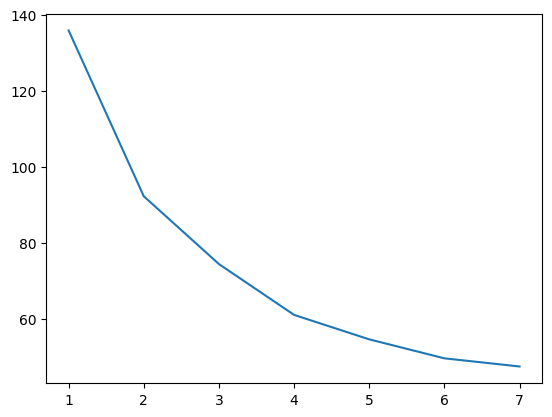

In [6]:
import matplotlib.pyplot as plt
D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

In [7]:
print(D)

[0.49348417587389704, 0.40883666957421494, 0.7496910802868036, 0.48121384805569123, 0.7762419060876609, 0.4287448174729684]
